In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv('model_description_mohanta.csv')
# find the index of the row with the variant == 'acceptreject'
acceptreject_index = df[df['Variant'] == 'acceptreject'].index
file_list = []
for i in range(len(df)):
    if not i in acceptreject_index:
        file_list.append("None")
    else:
        SHORTCODE = df.loc[i, 'SHORTCODE']
        data_dir = "../FlYMazeRL_Fits/acceptreject/mohanta2022/"
        files = os.listdir(data_dir)
        files = [f for f in files if f.startswith(SHORTCODE) and f.endswith('.nc')]
        if len(files) == 0:
            files = "None"
        else:
            files = 'acceptreject/mohanta2022/' + files[0]
            
        file_list.append(files)
df['FitDir'] = file_list.copy()
df.to_csv('model_description_mohanta.csv', index=False)


In [5]:
df[df['Variant']=='acceptreject']['FitDir']

7      acceptreject/mohanta2022/RBR_2022_09_28_14_47_...
8      acceptreject/mohanta2022/RBR_2022_09_28_14_47_...
9      acceptreject/mohanta2022/RBR_2022_09_28_14_47_...
17     acceptreject/mohanta2022/FRBR_2022_09_29_01_26...
18     acceptreject/mohanta2022/FRBR_2022_09_29_01_26...
                             ...                        
482                                                 None
483                                                 None
484                                                 None
485                                                 None
486                                                 None
Name: FitDir, Length: 134, dtype: object

(array([0.        , 0.        , 0.01441613, 0.01403032, 0.01205782,
        0.01035157, 0.00919415, 0.00762376, 0.0070858 , 0.00574363,
        0.00503722, 0.00435799, 0.00385807, 0.00339619, 0.00284736,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200.]),
 <BarContainer object of 20 artists>)

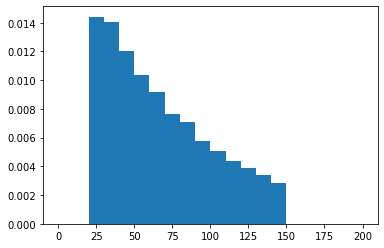

In [21]:
import numpy as np
import matplotlib.pyplot as plt

samples1 = np.random.geometric(p=0.013, size=10000)
samples2 = np.random.geometric(p=0.01, size=10000)
samples3 = np.random.geometric(p=0.02, size=10000)

# join the samples
samples = np.concatenate((samples1, samples2, samples3))
# everything more than 150 is set to 150
samples=samples[samples < 150]
# everything less than 15 is set to 15
samples = samples[samples > 20]

# plot the histogram
plt.hist(samples, bins=np.linspace(0, 200, 21), density=True)